<a href="https://colab.research.google.com/github/Jonathan-code-hub/MAT-422-Math-Methods-in-Data-Science/blob/main/Homework_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.4.1. MLE for Random Samples

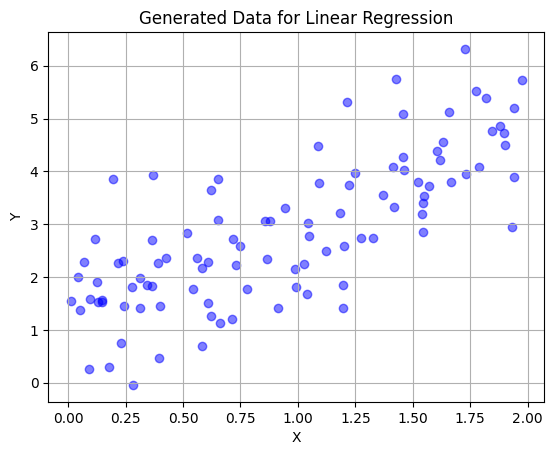

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility #
np.random.seed(42)

# Generate random data #
true_slope = 2.0
true_intercept = 1.0
num_samples = 100
X = 2 * np.random.rand(num_samples)
noise = np.random.normal(0, 1, num_samples)
Y = true_slope * X + true_intercept + noise

# Plot the generated data #
plt.scatter(X, Y, color='blue', alpha=0.5)
plt.title("Generated Data for Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

True intercept: 1.0, MLE intercept: 1.22
True slope: 2.0, MLE slope: 1.77


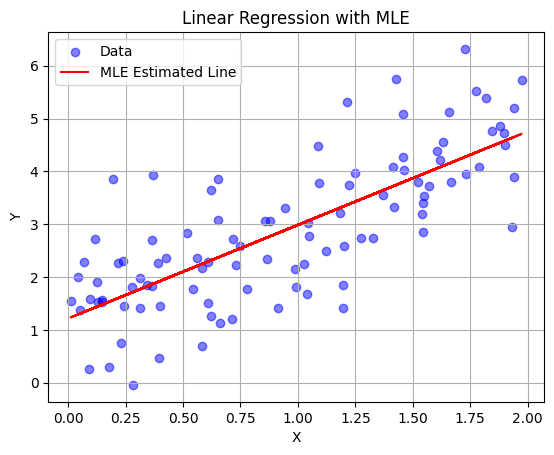

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the negative log-likelihood function for linear regression #
def neg_log_likelihood(params, X, Y):
    intercept, slope = params
    predicted_Y = intercept + slope * X
    residuals = Y - predicted_Y
    sigma_squared = np.var(residuals)
    n = len(Y)
    nll = 0.5 * n * np.log(2 * np.pi * sigma_squared) + 0.5 * np.sum((residuals ** 2) / sigma_squared)
    return nll

# Initial parameter guess #
initial_params = [0, 0]

# Perform the optimization to minimize the negative log-likelihood #
result = minimize(neg_log_likelihood, initial_params, args=(X, Y))
mle_intercept, mle_slope = result.x

print(f"True intercept: {true_intercept}, MLE intercept: {mle_intercept:.2f}")
print(f"True slope: {true_slope}, MLE slope: {mle_slope:.2f}")

# Plotting the data with the MLE estimated regression line #
plt.scatter(X, Y, color='blue', alpha=0.5, label='Data')
plt.plot(X, mle_intercept + mle_slope * X, color='red', label='MLE Estimated Line')
plt.title("Linear Regression with MLE")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Seed for reproducibility #
np.random.seed(42)

# Generate random data #
num_samples = 100
X1 = 2 * np.random.rand(num_samples)
X2 = 3 * np.random.rand(num_samples)
noise = np.random.normal(0, 1, num_samples)
Y = 1.0 + 2.0 * X1 + 3.0 * X2 + noise

# Prepare the data for statsmodels #
X = np.column_stack((X1, X2))
X = sm.add_constant(X)  # Adds a column of ones for the intercept term #

# Fit the model using statsmodels #
model = sm.OLS(Y, X).fit()
print(model.summary())

# Extracting MLE estimates #
mle_intercept, mle_slope1, mle_slope2 = model.params

print(f"MLE intercept: {mle_intercept:.2f}")
print(f"MLE slope for X1: {mle_slope1:.2f}")
print(f"MLE slope for X2: {mle_slope2:.2f}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     461.5
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           2.76e-50
Time:                        03:47:25   Log-Likelihood:                -139.10
No. Observations:                 100   AIC:                             284.2
Df Residuals:                      97   BIC:                             292.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9106      0.254      3.582      0.0

2.4.2. Linear Regression

Simple Linear Regression Model

Intercept: 4.22, Slope: 2.77


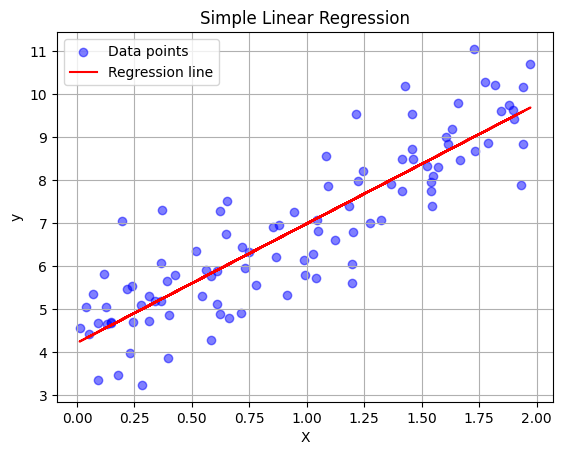

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data #
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit the linear regression model #
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Coefficients #
intercept = lin_reg.intercept_[0]
slope = lin_reg.coef_[0][0]

print(f"Intercept: {intercept:.2f}, Slope: {slope:.2f}")

# Plot the results #
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Multilinear Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Generate synthetic data #
np.random.seed(42)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
y = 4 + 3 * X1 + 5 * X2 + np.random.randn(100, 1)

# Combine X1 and X2 into a single array #
X = np.hstack((X1, X2))

# Fit the linear regression model #
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Coefficients #
intercept = lin_reg.intercept_[0]
coefficients = lin_reg.coef_[0]

print(f"Intercept: {intercept:.2f}")
print(f"Coefficients: {coefficients}")

# No plot for multiple linear regression as it's multi-dimensional #

Intercept: 3.91
Coefficients: [2.82913734 5.23977047]


Polynomial Regression

Intercept: 4.56
Coefficients: [1.63887939 1.5810637 ]


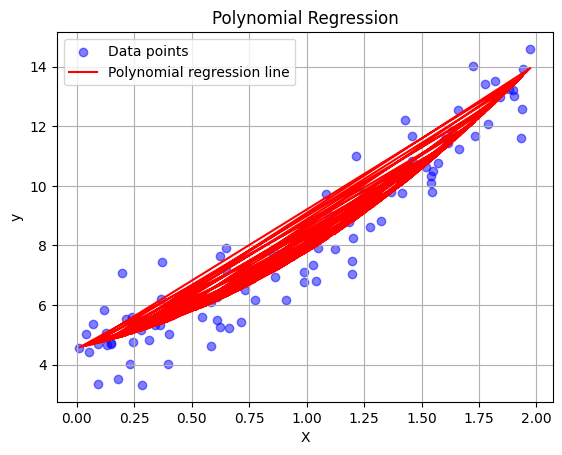

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data #
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + X**2 + np.random.randn(100, 1)

# Transform features to polynomial features #
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Fit the polynomial regression model #
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_poly_pred = poly_reg.predict(X_poly)

# Coefficients #
intercept = poly_reg.intercept_[0]
coefficients = poly_reg.coef_[0]

print(f"Intercept: {intercept:.2f}")
print(f"Coefficients: {coefficients}")

# Plot the results #
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.plot(X, y_poly_pred, color='red', label='Polynomial regression line')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Ridge Regression

Ridge Regression - Intercept: 4.29, Slope: 2.69


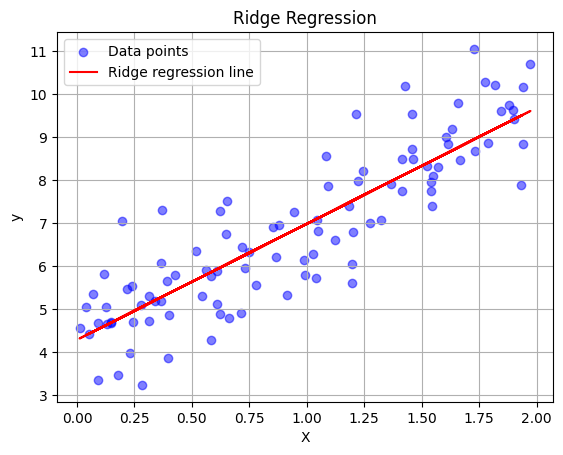

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge

# Generate synthetic data #
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit the Ridge regression model #
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
y_ridge_pred = ridge_reg.predict(X)

# Coefficients #
intercept = ridge_reg.intercept_[0]
slope = ridge_reg.coef_[0][0]

print(f"Ridge Regression - Intercept: {intercept:.2f}, Slope: {slope:.2f}")

# Plot the results #
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.plot(X, y_ridge_pred, color='red', label='Ridge regression line')
plt.title('Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Lasso Regression

Lasso Regression - Intercept: 4.48, Slope: 2.48


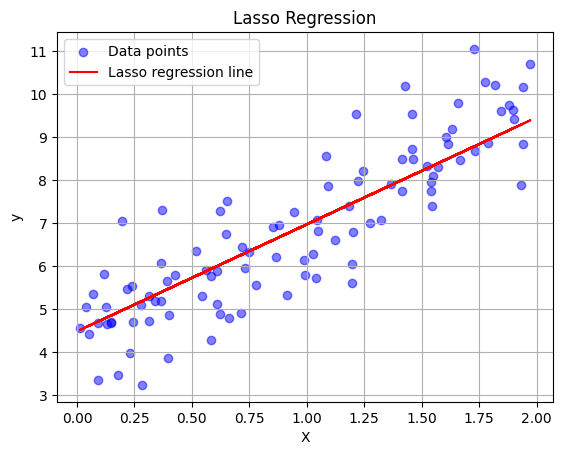

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Generate synthetic data #
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit the Lasso regression model #
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
y_lasso_pred = lasso_reg.predict(X)

# Coefficients #
intercept = lasso_reg.intercept_[0]
slope = lasso_reg.coef_[0]

print(f"Lasso Regression - Intercept: {intercept:.2f}, Slope: {slope:.2f}")

# Plot the results #
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.plot(X, y_lasso_pred, color='red', label='Lasso regression line')
plt.title('Lasso Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
